<a href="https://colab.research.google.com/github/NatashaYuzhakova/Practical-task-1/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D0%AE%D0%B6%D0%B0%D0%BA%D0%BE%D0%B2%D0%B0_%D0%9D%D0%92_%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Шаг 1. Загрузка данных

## 1.1. Используйте набор данных для задачи классификации изображений (например, набор данных CIFAR-10).

## 1.2. Загрузите данные и разделите их на тренировочный и тестовый наборы.


In [2]:
import tensorflow as tf # Импортируем библиотеки
from tensorflow import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
cifar100 = tf.keras.datasets.cifar100 # Загружаем наш набор данных cifar100
(x_train, y_train), (x_val, y_val) = cifar100.load_data()
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape) # Узнаем и выводим на экран количество элементов

169001437/169001437 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [4]:
print(x_train.shape, y_train.shape, x_val.shape, y_val.dtype) #

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) int64


In [5]:
print(x_train[10]) # Выведем на экран десятое изображение в виде массива

[[[ 83 132 178]
  [ 67 114 160]
  [ 61 108 154]
  ...
  [  9  26  57]
  [ 16  34  66]
  [ 35  59  94]]

 [[ 75 124 173]
  [ 71 119 167]
  [ 55 103 152]
  ...
  [ 39  67 107]
  [  9  28  65]
  [ 12  31  66]]

 [[ 73 121 173]
  [ 68 115 166]
  [ 74 122 172]
  ...
  [ 91 132 178]
  [ 53  83 125]
  [ 14  34  70]]

 ...

 [[159 187 223]
  [150 146 159]
  [191 154 143]
  ...
  [152 131 136]
  [173 143 158]
  [122 123 150]]

 [[157 171 202]
  [155 133 132]
  [183 152 141]
  ...
  [213 168 159]
  [196 146 153]
  [169 157 180]]

 [[150 160 186]
  [155 127 122]
  [179 149 139]
  ...
  [212 159 148]
  [187 136 135]
  [148 135 154]]]


In [6]:
import matplotlib.pyplot as plt # импорт библиотек для визуализации данных
%matplotlib inline

(-0.5, 31.5, 31.5, -0.5)

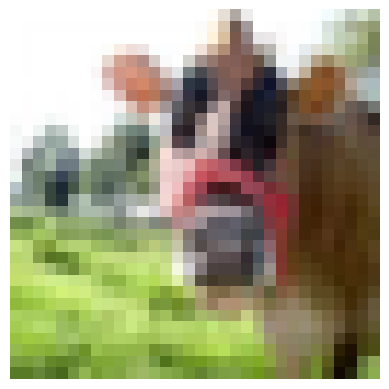

In [7]:
plt.imshow(x_train[0], cmap='binary') # Выведем на экран хранящееся в X_train[0] изображение
plt.axis('off')

In [8]:
print(cifar100.load_data())

((array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [195, 205, 193],
         [212, 224, 204],
         [182, 194, 167]],

        [[255, 255, 255],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [170, 176, 150],
         [161, 168, 130],
         [146, 154, 113]],

        [[255, 255, 255],
         [254, 254, 254],
         [255, 255, 255],
         ...,
         [189, 199, 169],
         [166, 178, 130],
         [121, 133,  87]],

        ...,

        [[148, 185,  79],
         [142, 182,  57],
         [140, 179,  60],
         ...,
         [ 30,  17,   1],
         [ 65,  62,  15],
         [ 76,  77,  20]],

        [[122, 157,  66],
         [120, 155,  58],
         [126, 160,  71],
         ...,
         [ 22,  16,   3],
         [ 97, 112,  56],
         [141, 161,  87]],

        [[ 87, 122,  41],
         [ 88, 122,  39],
         [101, 134,  56],
         ...,
         [ 34,  36,  10],
      

# Шаг 2. Создание сверточной нейронной сети

## 2.1. Импортируйте необходимые библиотеки, такие как TensorFlow и Keras.

## 2.2. Создайте сверточную нейронную сеть с несколькими сверточными слоями, слоями подвыборки (pooling), плотными слоями и выходным слоем.

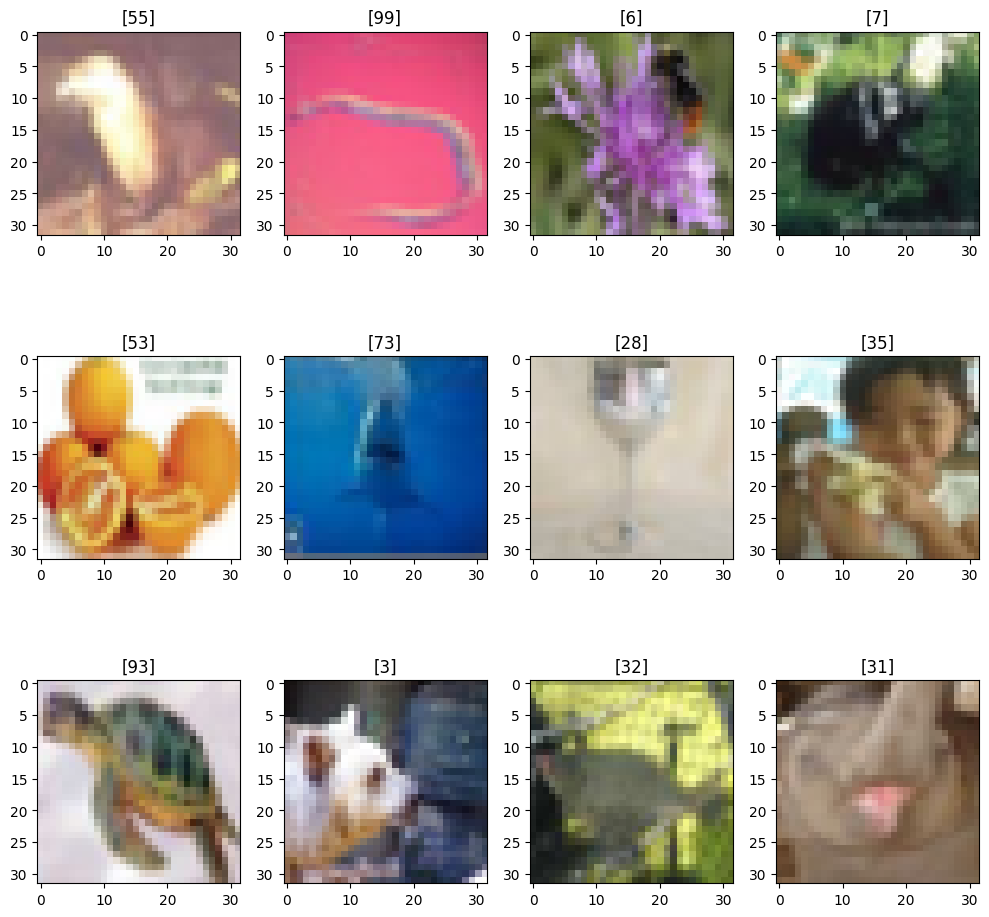

In [9]:
def show_samples(data, labels): # Выводим часть образцов на экран
    plt.subplots(figsize=(10, 10))
    for i in range(12):
        plt.subplot(3, 4, i+1)
        k = np.random.randint(0, data.shape[0])
        plt.title(labels[k])
        plt.imshow(data[k])
    plt.tight_layout()
    plt.show()


show_samples(x_train, y_train)

In [10]:
y_train = tf.one_hot(y_train, # Делим данные на проверку и обучение
                     depth=y_train.max() + 1,
                     dtype=tf.float64)
y_val = tf.one_hot(y_val,
                   depth=y_val.max() + 1,
                   dtype=tf.float64)

y_train = tf.squeeze(y_train)
y_val = tf.squeeze(y_val)


In [11]:
model = tf.keras.models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu',
                  input_shape=(32, 32, 3), padding='same'),
    layers.Conv2D(32, (3, 3), # Сверточный слой с 32 фильтрами, каждый размером 3x3.Функция активации ReLU
                  activation='relu',
                  padding='same'),
    layers.Conv2D(64, (3, 3), #Сверточный слой с 64 фильтрами, каждый размером 3x3
                  activation='relu',
                  padding='same'),
    layers.MaxPooling2D(2, 2),  #Максимальный слой пула с размером пула 2x2. Функция активации ReLU
    layers.Conv2D(128, (3, 3),
                  activation='relu',
                  padding='same'),


    layers.Flatten(), #Сгладить слой
    layers.Dense(256, activation='relu'), #Плотный слой с 256 нейронами и функцией активации ReLU
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(100, activation='softmax') #Плотный слой с 10 нейронами и функцией активации softmax
])

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['AUC', 'accuracy']
)


In [12]:
model.summary() # Печатаем сводку параметров

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                        

# Шаг 3. Обучение сверточной нейронной сети

## 3.1. Настройте параметры обучения, такие как оптимизатор, функция потерь и метрики.

## 3.2. Обучите сверточную нейронную сеть на тренировочных данных с использованием метода fit().

In [13]:
hist = model.fit(x_train, y_train,
                 epochs=5,
                 batch_size=64,
                 verbose=1,
                 validation_data=(x_val, y_val)) # acc – точность классификации на обучающих данных;loss – значение функции потерь на обучающих данных;val_acc – точность классификации на проверочных данных;val_loss – значение функции потерь на проверочных данных.

Epoch 1/5
782/782 [==============================] - 568s 718ms/step - loss: 3.9047 - auc: 0.7835 - accuracy: 0.1150 - val_loss: 3.4037 - val_auc: 0.8562 - val_accuracy: 0.1888
Epoch 2/5
782/782 [==============================] - 605s 773ms/step - loss: 3.4976 - auc: 0.8453 - accuracy: 0.1683 - val_loss: 3.5325 - val_auc: 0.8516 - val_accuracy: 0.1928
Epoch 3/5
782/782 [==============================] - 627s 801ms/step - loss: 3.0860 - auc: 0.8870 - accuracy: 0.2406 - val_loss: 3.2134 - val_auc: 0.9011 - val_accuracy: 0.2767
Epoch 4/5
782/782 [==============================] - 613s 784ms/step - loss: 2.8291 - auc: 0.9062 - accuracy: 0.2908 - val_loss: 2.9243 - val_auc: 0.9132 - val_accuracy: 0.3176
Epoch 5/5
782/782 [==============================] - 602s 771ms/step - loss: 2.5871 - auc: 0.9230 - accuracy: 0.3381 - val_loss: 2.6566 - val_auc: 0.9153 - val_accuracy: 0.3419


In [14]:
model.evaluate(x_val, y_val)
print()

313/313 [==============================] - 30s 97ms/step - loss: 2.6566 - auc: 0.9153 - accuracy: 0.3419



In [15]:
temp = model.get_layer('conv2d_3')
last_output = temp.output
last_output.shape

TensorShape([None, 16, 16, 128])

In [16]:
x = layers.Flatten()(last_output)

x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)

x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.BatchNormalization()(x)

output = layers.Dense(10, activation='softmax')(x)

model_new = keras.Model(model.input, output)

In [17]:
model_new.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       73856     
                                                             

In [18]:
model_new.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['AUC', 'accuracy']
)

In [19]:
# Загружаем данные
cifar10 = tf.keras.datasets.cifar10

# Разделяем на проверку и обучение
(x_train, y_train), (x_val, y_val) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [20]:
y_train = tf.one_hot(y_train, depth=10,
                     dtype=tf.float64)
y_val = tf.one_hot(y_val, depth=10,
                   dtype=tf.float64)

y_train = tf.squeeze(y_train)
y_val = tf.squeeze(y_val)

In [21]:
history = model_new.fit(x_train, y_train,
                        batch_size=64,
                        epochs=5,
                        verbose=1,
                        validation_data=(x_val, y_val)) # acc – точность классификации на обучающих данных;loss – значение функции потерь на обучающих данных;val_acc – точность классификации на проверочных данных;val_loss – значение функции потерь на проверочных данных.

Epoch 1/5
782/782 [==============================] - 573s 730ms/step - loss: 1.3417 - auc: 0.8982 - accuracy: 0.5320 - val_loss: 1.2662 - val_auc: 0.9092 - val_accuracy: 0.5467
Epoch 2/5
782/782 [==============================] - 602s 770ms/step - loss: 0.9455 - auc: 0.9488 - accuracy: 0.6682 - val_loss: 1.4126 - val_auc: 0.8999 - val_accuracy: 0.5448
Epoch 3/5
782/782 [==============================] - 612s 783ms/step - loss: 0.7816 - auc: 0.9645 - accuracy: 0.7267 - val_loss: 0.9085 - val_auc: 0.9522 - val_accuracy: 0.6891
Epoch 4/5
782/782 [==============================] - 600s 767ms/step - loss: 0.6642 - auc: 0.9741 - accuracy: 0.7669 - val_loss: 0.8980 - val_auc: 0.9565 - val_accuracy: 0.7149
Epoch 5/5
782/782 [==============================] - 570s 729ms/step - loss: 0.5022 - auc: 0.9845 - accuracy: 0.8228 - val_loss: 0.9589 - val_auc: 0.9512 - val_accuracy: 0.7014


# Шаг 4. Оценка производительности модели

## 4.1. Оцените производительность обученной модели на тестовых данных, используя метод evaluate().

## 4.2. Опубликуйте ссылку на Github в LMS Odin.

In [29]:
test_acc=model_new.evaluate(x_val, y_val)
print()

313/313 [==============================] - 39s 122ms/step - loss: 0.9589 - auc: 0.9512 - accuracy: 0.7014



In [30]:
print("Точность на тестовых данных:", test_acc)

Точность на тестовых данных: [0.958859384059906, 0.9512493014335632, 0.7013999819755554]


In [24]:
predictions = model.predict(x_train[:1])

print(predictions)

1/1 [==============================] - 0s 209ms/step
[[7.19315940e-05 2.54679151e-04 5.56225830e-04 7.48582557e-03
  3.97714078e-02 2.23588641e-03 2.51204965e-05 2.85890244e-04
  4.76332207e-04 1.24483816e-02 3.28773782e-02 4.83261538e-04
  2.41587564e-04 1.19148199e-05 1.27245556e-04 8.36325577e-04
  4.04395163e-03 4.11125002e-05 8.56751401e-04 3.91521375e-04
  2.04799173e-04 8.16738885e-03 5.25879040e-02 1.23498042e-03
  6.02970977e-05 1.46272248e-02 4.96331183e-03 1.80876465e-03
  9.93203092e-03 1.30570668e-03 1.14320975e-03 3.45924078e-03
  9.67077911e-03 2.26912964e-02 6.86685147e-04 2.12417101e-04
  1.36157440e-03 1.03729626e-05 6.39209058e-04 1.12283626e-03
  6.85214577e-03 4.12811823e-06 1.53944260e-02 1.52040850e-02
  2.39222590e-03 1.64935004e-03 5.81722101e-03 4.36979055e-04
  2.75512375e-05 2.27311266e-05 5.05926013e-02 2.09672842e-04
  9.98133328e-05 1.92148691e-05 1.49555171e-06 2.38941908e-02
  1.98826019e-05 4.94628795e-04 8.26326686e-06 1.58493815e-03
  8.76357590e-05 